## 3º Hack Days Comunidade DS

### 0.0 Libraries, Functions and Loading Data

In [244]:
import pandas as pd
import numpy as np
from sklearn import model_selection as ms
import seaborn as sns
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn import metrics
from sklearn import ensemble as en
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### 0.1 Functions

#### 0.2 Loading Data

In [245]:
train_raw = pd.read_csv('csv_files/train.csv')
test_raw = pd.read_csv('csv_files/test.csv')

In [246]:
# Spliting target variable column
X = train_raw.drop('limite_adicional', axis=1)
y = train_raw['limite_adicional'].copy()

# Spliting dataset into train and test datasets
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.20, random_state=42)

# Concateneting dataset
df1 = pd.concat([x_train, y_train], axis=1)

### 1.0 Data Description

#### 1.1 Shape

In [247]:
print(f'Números de linhas: {df1.shape[0]}')
print(f'Números de colunas: {df1.shape[1]}')

Números de linhas: 7600
Números de colunas: 17


#### 1.2 Columns

In [248]:
df1.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

#### 1.3 Data Types

In [249]:
df1.dtypes

id_cliente                   int64
idade                        int64
saldo_atual                float64
divida_atual               float64
renda_anual                float64
valor_em_investimentos     float64
taxa_utilizacao_credito    float64
num_emprestimos              int64
num_contas_bancarias         int64
num_cartoes_credito          int64
dias_atraso_dt_venc          int64
num_pgtos_atrasados          int64
num_consultas_credito        int64
taxa_juros                   int64
investe_exterior            object
pessoa_polit_exp            object
limite_adicional            object
dtype: object

#### 1.4 Check NA

In [250]:
df1.isna().sum()

id_cliente                 0
idade                      0
saldo_atual                0
divida_atual               0
renda_anual                0
valor_em_investimentos     0
taxa_utilizacao_credito    0
num_emprestimos            0
num_contas_bancarias       0
num_cartoes_credito        0
dias_atraso_dt_venc        0
num_pgtos_atrasados        0
num_consultas_credito      0
taxa_juros                 0
investe_exterior           0
pessoa_polit_exp           0
limite_adicional           0
dtype: int64

#### 1.5 Descriptive Statistics

In [251]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id_cliente,7600.0,6195.151184,3.590736e+03,1.000000,3101.250000,6135.000000,9298.250000,1.250000e+04
idade,7600.0,123.613684,6.767724e+02,18.000000,28.000000,38.000000,47.000000,8.598000e+03
saldo_atual,7600.0,403.503742,2.175478e+02,0.908146,271.744768,337.139895,470.944544,1.602041e+03
divida_atual,7600.0,1442.200337,1.160883e+03,0.230000,573.707500,1178.340000,1972.337500,4.998070e+03
renda_anual,7600.0,182809.120450,1.391849e+06,10473.865350,26205.526007,45899.953750,80399.209075,2.310824e+07
valor_em_investimentos,7600.0,611.175524,1.999520e+03,0.000000,76.063639,134.201478,251.619466,1.000000e+04
taxa_utilizacao_credito,7600.0,32.235292,5.133365e+00,20.992914,27.991416,32.205033,36.437150,4.956452e+01
num_emprestimos,7600.0,11.195789,6.453960e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
num_contas_bancarias,7600.0,17.816447,1.225567e+02,0.000000,3.000000,6.000000,8.000000,1.756000e+03
num_cartoes_credito,7600.0,21.951447,1.247211e+02,1.000000,4.000000,6.000000,7.000000,1.479000e+03


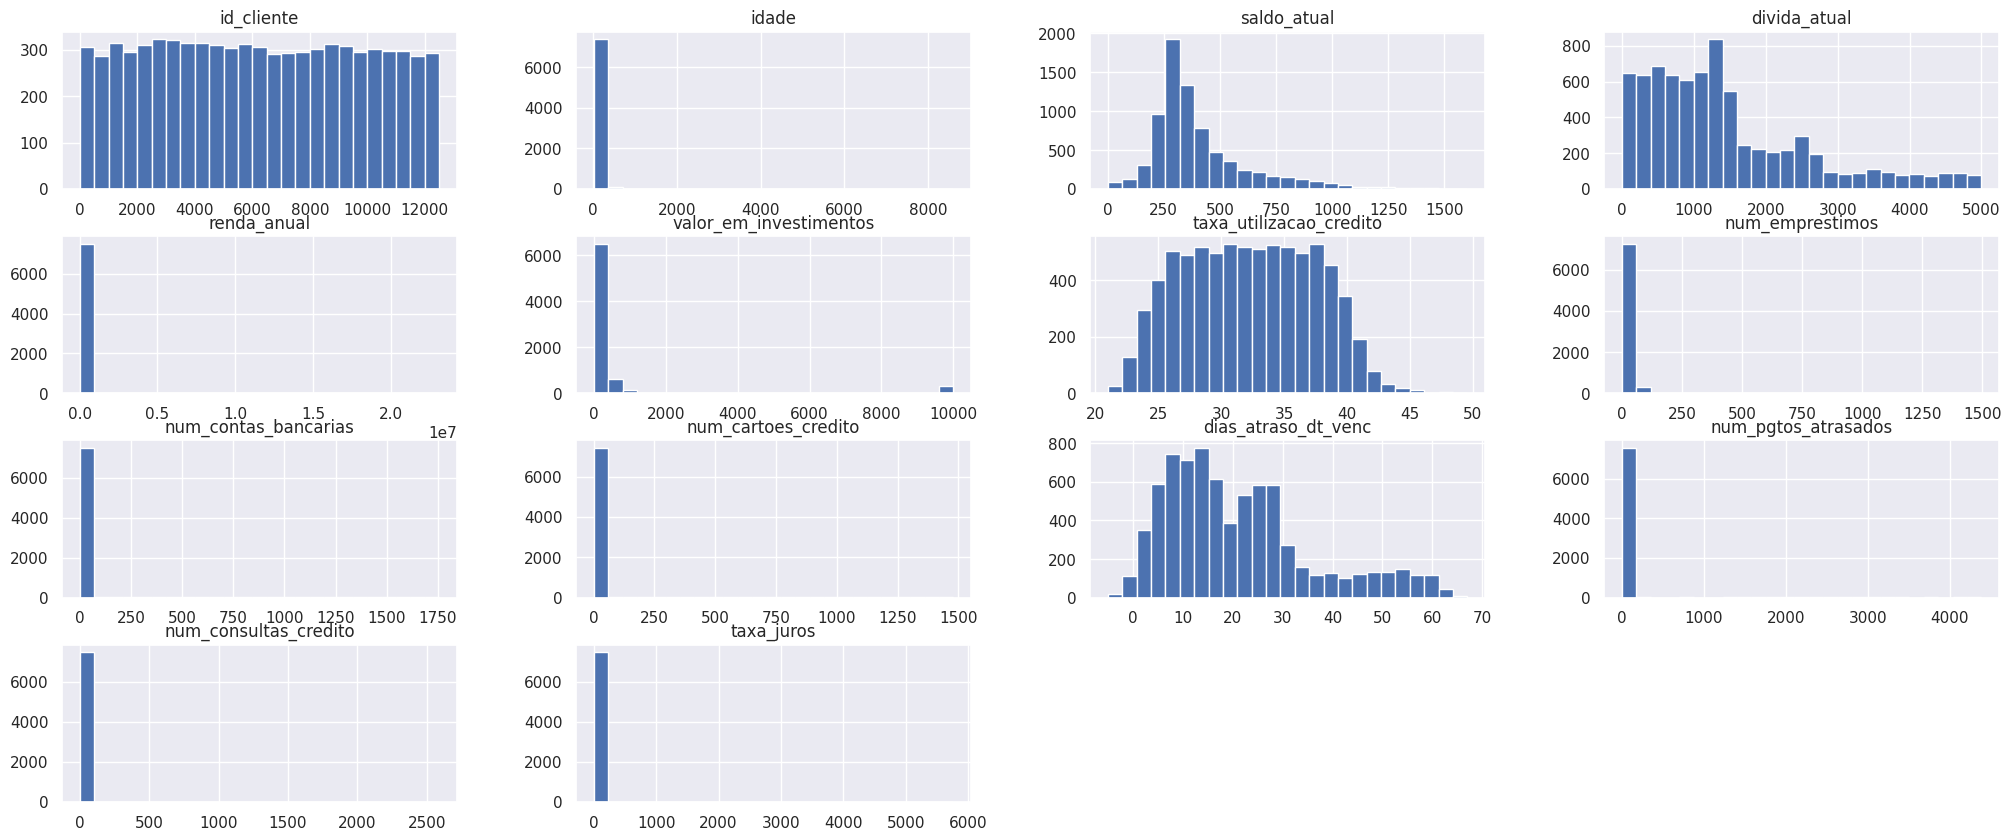

In [252]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])
num_attributes.hist(figsize=(25, 10), bins=25);

In [253]:
d1 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
d3 = pd.concat([d1, d2]).T.reset_index()
d3.columns = ['attributes', 'skew', 'kurtosis']
d3

,attributes,skew,kurtosis
0,id_cliente,0.025183,-1.195675
1,idade,9.252848,90.657098
2,saldo_atual,1.618415,3.114865
3,divida_atual,1.178158,0.803166
4,renda_anual,12.410241,162.923722
5,valor_em_investimentos,4.443809,17.937286
6,taxa_utilizacao_credito,0.053696,-0.919013
7,num_emprestimos,16.189707,303.296082
8,num_contas_bancarias,10.723897,119.087686
9,num_cartoes_credito,8.425038,74.368182


### 2.0 Feature Engineering

In [254]:
df2 = df1.copy()

In [255]:
# Potential investor/age
df2['pot_inv'] = df2['valor_em_investimentos'] / (df2['idade'] - 17) 
x_test['pot_inv'] = x_test['valor_em_investimentos'] / (x_test['idade'] - 17) 
test_raw['pot_inv'] = test_raw['valor_em_investimentos'] / (test_raw['idade'] - 17) 


# Potential debt/year
df2['pot_endiv'] = df2['divida_atual'] / (df2['idade'] - 17)
x_test['pot_endiv'] = x_test['divida_atual'] / (x_test['idade'] - 17)
test_raw['pot_endiv'] = test_raw['divida_atual'] / (test_raw['idade'] - 17)


# Potential per capita investment
df2['pot_capital'] = df2['pot_endiv'] - df2['pot_inv']
x_test['pot_capital'] = x_test['pot_endiv'] - x_test['pot_inv']
test_raw['pot_capital'] = test_raw['pot_endiv'] - test_raw['pot_inv']


# Debt by income
df2['renda_divida'] = df2['divida_atual'] / df2['renda_anual']
x_test['renda_divida'] = x_test['divida_atual'] / x_test['renda_anual']
test_raw['renda_divida'] = test_raw['divida_atual'] / test_raw['renda_anual']


# Salary withheld
df2['salario_retido'] =  df2['divida_atual'] / df2['renda_anual']
x_test['salario_retido'] =  x_test['divida_atual'] / x_test['renda_anual']
test_raw['salario_retido'] =  test_raw['divida_atual'] / test_raw['renda_anual']

### 3.0 Data Filtering

In [256]:
df3 = df2.copy()

In [257]:
# Manual Scaling for outliers
df3['idade'] = df3['idade'].apply(lambda x: 60 if x >= 65 else x)
x_test['idade'] = x_test['idade'].apply(lambda x: 60 if x >= 65 else x)
test_raw['idade'] = test_raw['idade'].apply(lambda x: 60 if x >= 65 else x)

df3['num_cartoes_credito'] = df3['num_cartoes_credito'].apply(lambda x: 15 if x >= 15 else x)
x_test['num_cartoes_credito'] = x_test['num_cartoes_credito'].apply(lambda x: 15 if x >= 15 else x)
test_raw['num_cartoes_credito'] = test_raw['num_cartoes_credito'].apply(lambda x: 15 if x >= 15 else x)

df3['num_emprestimos'] = df3['num_emprestimos'].apply(lambda x: df3['num_emprestimos'].median() if x >= 9 else x)
x_test['num_emprestimos'] = x_test['num_emprestimos'].apply(lambda x: x_test['num_emprestimos'].median() if x >= 9 else x)
test_raw['num_emprestimos'] = test_raw['num_emprestimos'].apply(lambda x: test_raw['num_emprestimos'].median() if x >= 9 else x)

### 4.0 Exploratory Data Analysis (EDA)

In [258]:
df4 = df3.copy()

In [259]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])

In [260]:
# Runing Sweetviz data visualization
# sweet = sv.analyze(df4);
# sweet.show_html();

In [261]:
num_attributes = df4.drop(['id_cliente'], axis=1)

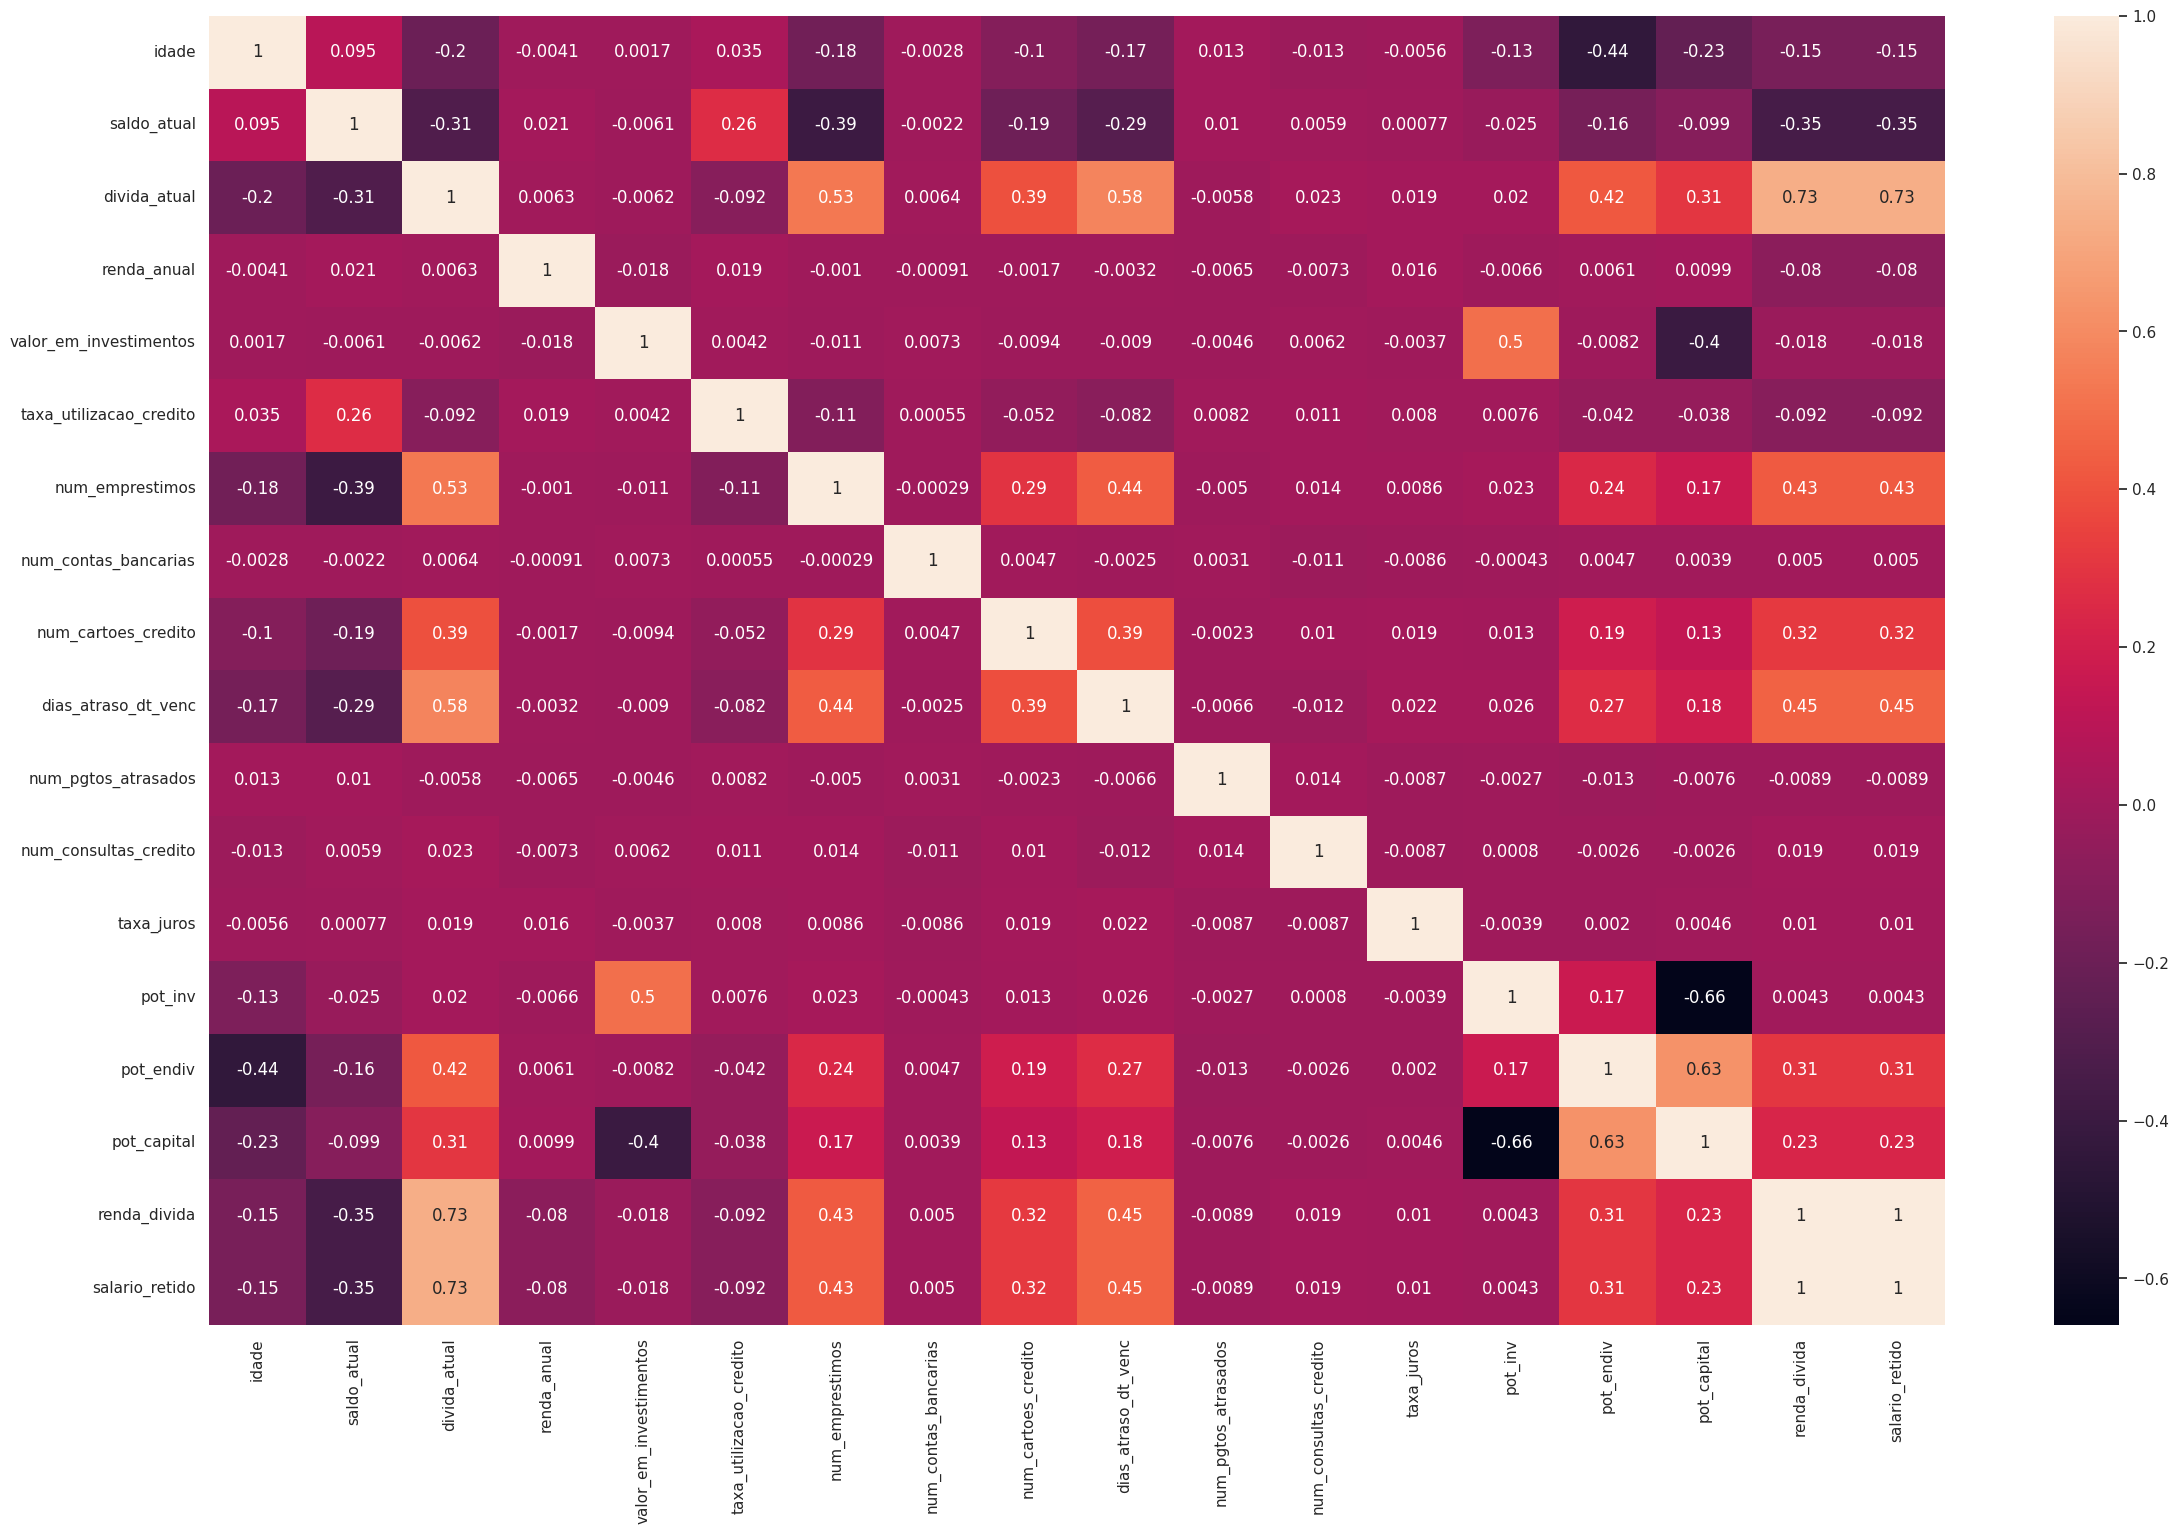

In [262]:
sns.set(rc={'figure.figsize':(28, 17)})
correlation = num_attributes.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation, annot=True);

### 5.0 Data Preparation

In [263]:
df5 = df4.copy()

In [264]:
df5.dtypes

id_cliente                   int64
idade                        int64
saldo_atual                float64
divida_atual               float64
renda_anual                float64
valor_em_investimentos     float64
taxa_utilizacao_credito    float64
num_emprestimos            float64
num_contas_bancarias         int64
num_cartoes_credito          int64
dias_atraso_dt_venc          int64
num_pgtos_atrasados          int64
num_consultas_credito        int64
taxa_juros                   int64
investe_exterior            object
pessoa_polit_exp            object
limite_adicional            object
pot_inv                    float64
pot_endiv                  float64
pot_capital                float64
renda_divida               float64
salario_retido             float64
dtype: object

In [265]:
categorical = df5.select_dtypes(exclude=['float64', 'int64'])
categorical.apply(lambda x: x.unique().shape[0])

investe_exterior    2
pessoa_polit_exp    2
limite_adicional    2
dtype: int64

In [266]:
# Encoding categorical attributes
le = LabelEncoder()

df5['investe_exterior'] = le.fit_transform(df5['investe_exterior'])
x_test['investe_exterior'] = le.transform(x_test['investe_exterior'])
test_raw['investe_exterior'] = le.transform(test_raw['investe_exterior'])

df5['pessoa_polit_exp'] = le.fit_transform(df5['pessoa_polit_exp'])
x_test['pessoa_polit_exp'] = le.transform(x_test['pessoa_polit_exp'])
test_raw['pessoa_polit_exp'] = le.transform(test_raw['pessoa_polit_exp'])

In [267]:
numerical = df5.select_dtypes(exclude=['object'])
numerical.apply(lambda x: x.unique().shape[0])

id_cliente                 7600
idade                        42
saldo_atual                7527
divida_atual               7490
renda_anual                7594
valor_em_investimentos     6896
taxa_utilizacao_credito    7600
num_emprestimos               9
num_contas_bancarias        111
num_cartoes_credito          11
dias_atraso_dt_venc          73
num_pgtos_atrasados          84
num_consultas_credito       126
taxa_juros                  165
investe_exterior              2
pessoa_polit_exp              2
pot_inv                    6995
pot_endiv                  7595
pot_capital                7600
renda_divida               7600
salario_retido             7600
dtype: int64

In [268]:
# Applying Numerical Scaling to minimize the outliers outcome difference
mms = MinMaxScaler()
rs = RobustScaler()
ss = StandardScaler()

df5['idade'] = rs.fit_transform(df5[['idade']])
x_test['idade'] = rs.fit_transform(x_test[['idade']])
test_raw['idade'] = rs.fit_transform(test_raw[['idade']])

df5['num_cartoes_credito'] = rs.fit_transform(df5[['num_cartoes_credito']])
x_test['num_cartoes_credito'] = rs.fit_transform(x_test[['num_cartoes_credito']])
x_train['num_cartoes_credito'] = rs.fit_transform(x_train[['num_cartoes_credito']])

df5['num_emprestimos'] = rs.fit_transform(df5[['num_emprestimos']])
x_test['num_emprestimos'] = rs.fit_transform(x_test[['num_emprestimos']])
test_raw['num_emprestimos'] = rs.fit_transform(test_raw[['num_emprestimos']])

df5['num_contas_bancarias'] = rs.fit_transform(df5[['num_contas_bancarias']])
x_test['num_contas_bancarias'] = rs.fit_transform(x_test[['num_contas_bancarias']])
test_raw['num_contas_bancarias'] = rs.fit_transform(test_raw[['num_contas_bancarias']])

### 6.0 Feature Selection

In [269]:
df6 = df5.copy()

In [270]:
df6 = df6.drop(['pessoa_polit_exp'], axis=1)
x_test = x_test.drop(['pessoa_polit_exp'], axis=1)
test_raw = test_raw.drop(['pessoa_polit_exp'], axis=1)

df6 = df6.drop(['id_cliente'], axis=1)
x_test = x_test.drop(['id_cliente'], axis=1)
test_raw = test_raw.drop(['id_cliente'], axis=1)

### 7.0 Machine Learning Modelling

In [271]:
df7 = df6.copy()

In [272]:
X = df7.drop('limite_adicional', axis=1)
y = df7['limite_adicional'].copy()

In [273]:
y = le.fit_transform(y)
y_test = le.fit_transform(y_test)

#### Model Random Forest Classifier

In [274]:
rfc_model = en.RandomForestClassifier(random_state=42)

rfc_model.fit(X, y)

y_hat_rfc = rfc_model.predict(x_test)

rfc_result = metrics.f1_score(y_test, y_hat_rfc)
rfc_result

0.9249999999999999

In [275]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_rfc)
accuracy = metrics.accuracy_score(y_test, y_hat_rfc)
recall = metrics.recall_score(y_test, y_hat_rfc)
precision = metrics.precision_score(y_test, y_hat_rfc)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.925000
Accuracy,0.870526
Recall,0.957702
Precision,0.894458


In [276]:
# cm = confusion_matrix(y_test, y_hat_rfc, labels=rfc_model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_model.classes_)
# disp.plot();

#### Model LGBMClassifier

In [277]:
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1)

lgbm_model.fit(X, y)

y_hat_lgbm = lgbm_model.predict(x_test)

lgbm_result = metrics.f1_score(y_test, y_hat_lgbm)
lgbm_result

0.9264841587203937

In [278]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_lgbm)
accuracy = metrics.accuracy_score(y_test, y_hat_lgbm)
recall = metrics.recall_score(y_test, y_hat_lgbm)
precision = metrics.precision_score(y_test, y_hat_lgbm)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.926484
Accuracy,0.874211
Recall,0.950758
Precision,0.903419


#### Model XGBoost Classifier

In [279]:
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X, y)

y_hat_xgb = xgb_model.predict(x_test)

xgb_result = metrics.f1_score(y_test, y_hat_xgb)
xgb_result

0.9203647416413373

In [280]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_xgb)
accuracy = metrics.accuracy_score(y_test, y_hat_xgb)
recall = metrics.recall_score(y_test, y_hat_xgb)
precision = metrics.precision_score(y_test, y_hat_xgb)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.920365
Accuracy,0.862105
Recall,0.955808
Precision,0.887456


#### Model KNN Classifier

In [281]:
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

knn_model.fit(X, y)

y_hat_knn = knn_model.predict(x_test)

knn_result = metrics.f1_score(y_test, y_hat_knn)
knn_result

0.8943430110745286

In [282]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_knn)
accuracy = metrics.accuracy_score(y_test, y_hat_knn)
recall = metrics.recall_score(y_test, y_hat_knn)
precision = metrics.precision_score(y_test, y_hat_knn)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.894343
Accuracy,0.814211
Recall,0.943182
Precision,0.850313


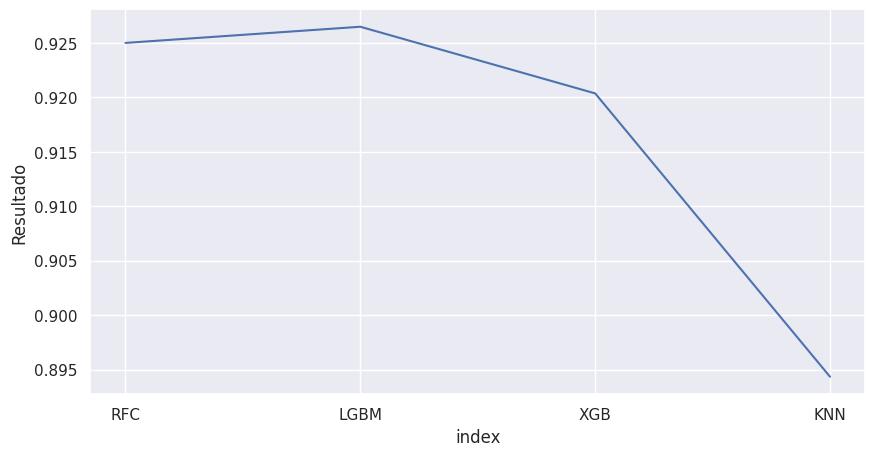

In [304]:
sns.set(rc={'figure.figsize':(10, 5)})
# Comparing the F1 Score of the four models above
results = pd.DataFrame([rfc_result, lgbm_result, xgb_result, knn_result], index=['RFC', 'LGBM', 'XGB', 'KNN'])
results.columns = ['Resultado']
results.sort_values(by='Resultado', ascending=False)
results = results.reset_index()
sns.lineplot(data=results, x='index', y='Resultado');

### 8.0 Ensemble Learning

In [284]:
df8 = df7.copy()

In [285]:
X = df8.drop('limite_adicional', axis=1)
y = df8['limite_adicional'].copy()
y = le.fit_transform(y)

In [286]:
# unique, counts = np.unique(y_test, return_counts=True)
# counts

In [287]:
rf_model = en.RandomForestClassifier(n_estimators=502, random_state=42, n_jobs=-1)
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, n_jobs=-1)
lgbm_model = LGBMClassifier(n_estimators=502, random_state=42, n_jobs=-1)
et_model = en.ExtraTreesClassifier(n_estimators=502, random_state=42, n_jobs=-1)
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
ada_clf = AdaBoostClassifier(n_estimators=502, random_state=42)
gnb_model = GaussianNB()


voting_clf = VotingClassifier(
    estimators=[('random_forest', rf_model), ('logistic_regression', lr_clf), ('extra_tree', et_model), ('lgbm', lgbm_model), 
                ('knn', knn_clf), ('ada', ada_clf), ('gaussNB', gnb_model)],
    voting='soft', # 'soft' usa probabilidades para votação, enquanto 'hard' usa rótulos
    weights=[1, 1, 1, 1, 1, 1, 1], # Pode ser usado para ponderar a importância de cada classificador, como [2, 1, 3, ...]
    n_jobs=-1)

voting_clf.fit(X, y)

y_pred_vot = voting_clf.predict(x_test)

In [288]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_pred_vot)
accuracy = metrics.accuracy_score(y_test, y_pred_vot)
recall = metrics.recall_score(y_test, y_pred_vot)
precision = metrics.precision_score(y_test, y_pred_vot)


results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado']
results

,Resultado
F1,0.927317
Accuracy,0.873684
Recall,0.966540
Precision,0.891153


### 9.0 Hyperparameter Fine Tuning

#### 9.1 Random Search


In [289]:
# parameters = {'max_depth': np.arange(2, 12, 2), 
#               'num_leaves': 2 ** np.arange(2, 10, 2),
#               'min_data_in_leaf': np.arange(650, 1050, 50), 
#               'learning_rate': np.linspace(0.001, 0.6, 15),
#               'colsample_bytree': np.linspace(0.1, 1, 5),
#               'subsample': np.linspace(0.01, 1, 15),
#               'n_estimators': np.arange(10, 105, 15)}

# lgbm_random_cv = RandomizedSearchCV(estimator=lgbm, param_distributions=parameters,
#                                 scoring='f1', n_iter=100, cv=10, verbose=2, n_jobs=-1)

# a = lgbm_random_cv.fit(X_train, y_train)
# a.best_estimator_

In [290]:
# lgbm_tunned = LGBMClassifier(learning_rate=0.3860714285714285, max_depth=10,
#                min_data_in_leaf=650, n_estimators=40, num_leaves=256,
#                subsample=0.3635714285714286)

# lgbm_model = lgbm_tunned.fit(X_train, y_train)
# yh = lgbm_model.predict(X_test)
# yhp = lgbm_model.predict_proba(X_test)

# lgbm_model = df_scores(model_name='LGBMClassifier Tunned', y_test=y_test, y_pred=yh, y_proba=yhp, normalize=True)

# cross_validation(lgbm, X_train, y_train, verb=True, k=10)


### 9.0 Submission